# Random normal distribution

Several calculations with normal (Gaussian) distributions

Used in exercise 1.32 and 1.37 

- random numbers according to normal distribution
- quantil and p-values of normal distribution


In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

## Random numbers according to normal distribution

In [2]:
# make your own normal random number generator
# using the instructions in exercise 1.37
N = 10**5
mu = 2
sigma = 4
U1 = np.random.rand(N) # np.array
U2 = np.random.rand(N) # np.array
X1 = np.sin(2*np.pi*U1)*np.sqrt(-2*np.log(U2)) # np.array
X2 = np.cos(2*np.pi*U1)*np.sqrt(-2*np.log(U2)) # np.array
N1 = mu + sigma*X1
N2 = mu + sigma*X2
# show that N1, N2 are normally distributed
# with mean mu and standard deviation sigma
print("N1.mean: ",N1.mean())
print("N2.mean: ",N2.mean())
print("N1.std: ",N1.std())
print("N2.std: ",N2.std())

N1.mean:  1.9824117852708014
N2.mean:  2.004883718013635
N1.std:  3.992606231052779
N2.std:  3.985885979640678


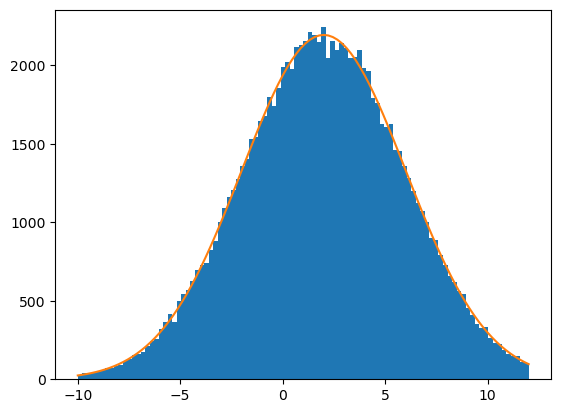

In [3]:
# plot normal distribution and compare with theory
nbin = 100
xlow = -10
xup  =  12
binsize = (xup-xlow)/100 
plt.hist(N1,nbin,(-10,12))
x = np.linspace(-10,12, num=100) # array of 100 equally space numbers in (-10,12)
gauss = lambda x,mu,sigma:np.exp(-( ((x-mu)/sigma)**2)/2)/(sigma*np.sqrt(2*np.pi))
plt.plot(x,gauss(x,mu,sigma)*N*binsize) # plot gaussian function normalized to hist

plt.show()

# Calculate quantils

see exercise 1.32

In [4]:
# First method: use X1 and X2 to estimate the quantil
print(" x        p     1-p ")
for x in np.arange(0,5,0.1):
    q = np.sum(X1 < x)/N
    print("{:.2f}   {:.3f}   {:.3f} ".format(x,q,1-q))

 x        p     1-p 
0.00   0.502   0.498 
0.10   0.540   0.460 
0.20   0.579   0.421 
0.30   0.618   0.382 
0.40   0.655   0.345 
0.50   0.692   0.308 
0.60   0.728   0.272 
0.70   0.760   0.240 
0.80   0.789   0.211 
0.90   0.817   0.183 
1.00   0.843   0.157 
1.10   0.865   0.135 
1.20   0.886   0.114 
1.30   0.905   0.095 
1.40   0.921   0.079 
1.50   0.935   0.065 
1.60   0.946   0.054 
1.70   0.957   0.043 
1.80   0.966   0.034 
1.90   0.972   0.028 
2.00   0.978   0.022 
2.10   0.983   0.017 
2.20   0.987   0.013 
2.30   0.990   0.010 
2.40   0.992   0.008 
2.50   0.994   0.006 
2.60   0.996   0.004 
2.70   0.997   0.003 
2.80   0.997   0.003 
2.90   0.998   0.002 
3.00   0.999   0.001 
3.10   0.999   0.001 
3.20   0.999   0.001 
3.30   1.000   0.000 
3.40   1.000   0.000 
3.50   1.000   0.000 
3.60   1.000   0.000 
3.70   1.000   0.000 
3.80   1.000   0.000 
3.90   1.000   0.000 
4.00   1.000   0.000 
4.10   1.000   0.000 
4.20   1.000   0.000 
4.30   1.000   0.000 
4.40   1.00

From the above list one can read off that 
between 1.6 < x < 1.7 the p-value is about 95%. Therefor<br>
quantil(95%) is about 1.65<br>
quantil (5%) is about - 1.65

In [6]:
# exact calculation of quantil using scipy.stats.norm.ppf
print("quantil(5): ",sp.stats.norm.ppf(0.05, loc=0, scale=1))
print("quantil(95): ",sp.stats.norm.ppf(0.95, loc=0, scale=1))

quantil(5):  -1.6448536269514729
quantil(95):  1.644853626951472


In [12]:
# Calculate p-values for x = -5, -4, -3, -2, -1
print("  x    p-value")
for x in [-5, -4, -3, -2, -1]:
    p = sp.stats.norm.cdf(x, loc=0, scale=1)
    print("{:.1f}   {:.4g}".format(x,p))

  x    p-value
-5.0   2.867e-07
-4.0   3.167e-05
-3.0   0.00135
-2.0   0.02275
-1.0   0.1587
